In [62]:
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [63]:
df = pd.read_csv("../ficheros/diamons_enconding.csv", index_col = 0)
df.head()

,carat,depth,table,price,x,y,z,cut_map,color_map,clarity_map
1,0.23,61.5,55.0,326,3.95,3.98,2.43,4,5,1
2,0.21,59.8,61.0,326,3.89,3.84,2.31,3,5,2
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,5,4
4,0.29,62.4,58.0,334,4.20,4.23,2.63,3,1,3
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,1


In [64]:
X = df.drop("price", axis = 1)
y = df["price"]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [66]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [67]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [68]:
#Es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [69]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
34915,880,477.102597,Train
20331,8736,7692.039067,Train
17153,6848,6605.440777,Train
49187,2075,2259.005743,Train
17016,6793,6420.073325,Train


In [70]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
34915,880,477.102597,Train,402.897403
20331,8736,7692.039067,Train,1043.960933
17153,6848,6605.440777,Train,242.559223
49187,2075,2259.005743,Train,-184.005743
17016,6793,6420.073325,Train,372.926675


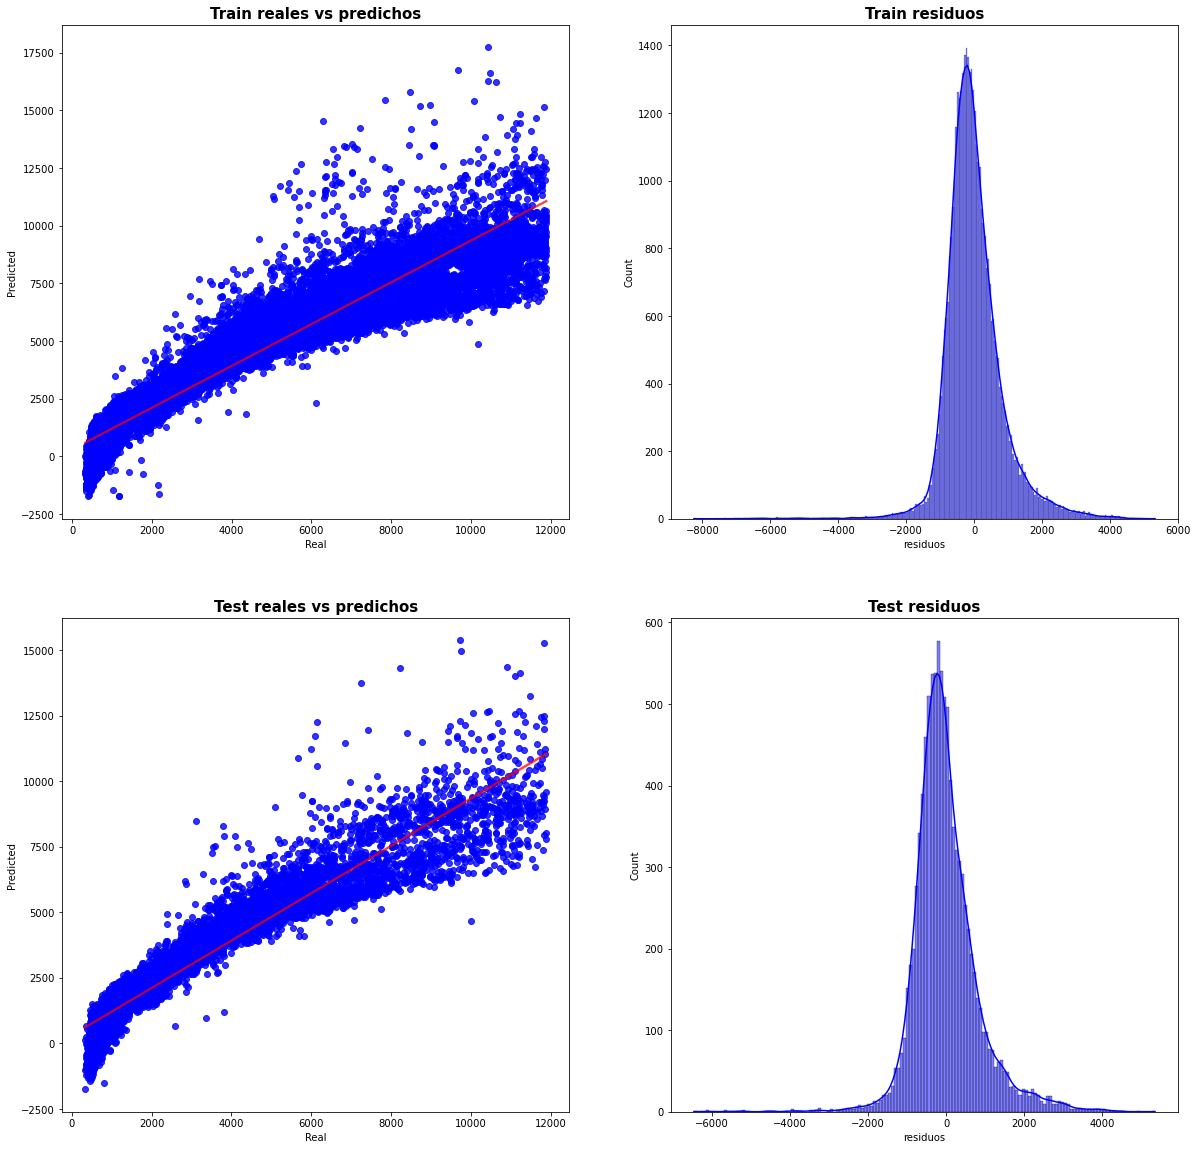

In [71]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="blue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "blue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [72]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9055440051154418
El MAE es 592.658127309242
El MSE es 722504.4826393583
EL RMSE es  850.0026368425914
Para el conjunto test:---------------
El valor de r2 score es  0.9061201734641039
El MAE es 590.9140627651342
El MSE es 713235.4991300039
EL RMSE es  844.5327105151131


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50242.0,0.722995,0.381567,0.20,0.38,0.70,1.01,2.77
depth,50242.0,61.754333,1.426388,43.00,61.10,61.80,62.50,79.00
table,50242.0,57.422410,2.227616,43.00,56.00,57.00,59.00,79.00
price,50242.0,3159.144222,2763.857194,326.00,911.00,2155.00,4668.00,11888.00
x,50242.0,5.582681,0.991198,3.73,4.67,5.59,6.43,8.93
y,50242.0,5.585400,0.983783,3.68,4.68,5.58,6.42,8.83
z,50242.0,3.448151,0.613879,1.41,2.88,3.43,3.98,5.60
cut_map,50242.0,2.906373,1.120846,0.00,2.00,3.00,4.00,4.00
color_map,50242.0,3.453047,1.689767,0.00,2.00,3.00,5.00,6.00
clarity_map,50242.0,3.078799,1.649553,0.00,2.00,3.00,4.00,7.00


In [74]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,590.914063,713235.499130,844.532711,0.906120,test,Linear Regresion
1,592.658127,722504.482639,850.002637,0.905544,train,LinearRegression


In [75]:
df_resultados.to_csv("../ficheros/resultados_diamond.csv")

Despues de valorar los resultados tan malos que hemos obtenido, vamos a eliminar ,x,y,z para a ver si asi mejoran

In [76]:
df2= df.drop(columns=["x","y","z"], axis = 1) 
df2.head()

,carat,depth,table,price,cut_map,color_map,clarity_map
1,0.23,61.5,55.0,326,4,5,1
2,0.21,59.8,61.0,326,3,5,2
3,0.23,56.9,65.0,327,1,5,4
4,0.29,62.4,58.0,334,3,1,3
5,0.31,63.3,58.0,335,1,0,1


In [77]:
X = df2.drop("price", axis = 1)
y = df2["price"]

In [78]:
st = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
lr = LinearRegression(n_jobs=-1)

In [80]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [81]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [82]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
34915,880,477.102597,Train
20331,8736,7692.039067,Train
17153,6848,6605.440777,Train
49187,2075,2259.005743,Train
17016,6793,6420.073325,Train


In [83]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
34915,880,477.102597,Train,402.897403
20331,8736,7692.039067,Train,1043.960933
17153,6848,6605.440777,Train,242.559223
49187,2075,2259.005743,Train,-184.005743
17016,6793,6420.073325,Train,372.926675


In [84]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9055440051154418
El MAE es 592.658127309242
El MSE es 722504.4826393583
EL RMSE es  850.0026368425914
Para el conjunto test:---------------
El valor de r2 score es  0.9061201734641039
El MAE es 590.9140627651342
El MSE es 713235.4991300039
EL RMSE es  844.5327105151131


segiomos probando

In [85]:
df3 = pd.read_csv("../ficheros/diamons_estand_enconding.csv", index_col = 0)
df3.head()

,carat,depth,table,price,x,y,z,cut_map,color_map,clarity_map
0,-0.746032,-0.214286,-0.666667,326,-0.931818,-0.919540,-0.909091,4,5,1
1,-0.777778,-1.428571,1.333333,326,-0.965909,-1.000000,-1.018182,3,5,2
2,-0.746032,-3.500000,2.666667,327,-0.875000,-0.867816,-1.018182,1,5,4
3,-0.650794,0.428571,0.333333,334,-0.789773,-0.775862,-0.727273,3,1,3
4,-0.619048,1.071429,0.333333,335,-0.710227,-0.706897,-0.618182,1,0,1


In [86]:
X = df3.drop("price", axis = 1)
y = df3["price"]

In [87]:
st = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
lr = LinearRegression(n_jobs=-1)

In [89]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [90]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [91]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
34915,880,477.102597,Train
20331,8736,7692.039067,Train
17153,6848,6605.440777,Train
49187,2075,2259.005743,Train
17016,6793,6420.073325,Train


In [92]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
34915,880,477.102597,Train,402.897403
20331,8736,7692.039067,Train,1043.960933
17153,6848,6605.440777,Train,242.559223
49187,2075,2259.005743,Train,-184.005743
17016,6793,6420.073325,Train,372.926675


In [93]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9055440051154418
El MAE es 592.658127309242
El MSE es 722504.4826393583
EL RMSE es  850.0026368425914
Para el conjunto test:---------------
El valor de r2 score es  0.9061201734641039
El MAE es 590.9140627651342
El MSE es 713235.4991300039
EL RMSE es  844.5327105151131


Todas las pruebas realizadas nos danlos mismos resultados; R2 0.9 que quiere decir que nuestro modelo puedo explicar un 90% de la variazion del valor de los diamantes, el resto de los alores rmse nos parece un poco alto, ya que es casi el 10 % del precio maximo 